In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [190]:
url = url = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
dataset = pd.read_csv(url)
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])

In [192]:
dataset.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [193]:
from datetime import datetime
indexedDataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


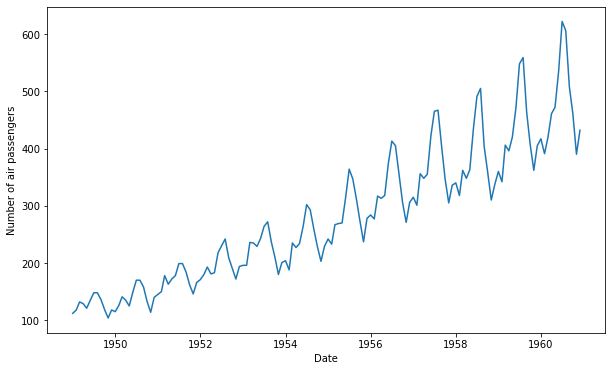

In [194]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [195]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


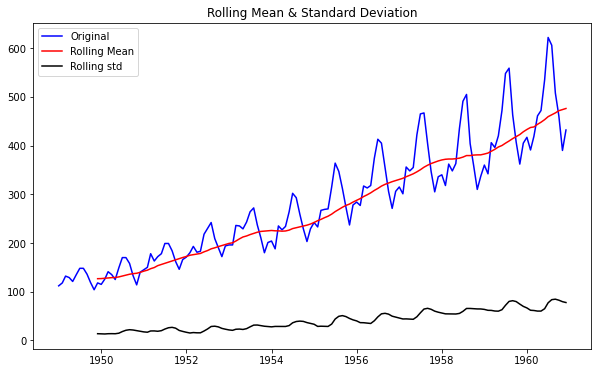

In [13]:
orig = plt.plot(indexedDataset, color = 'blue', label ='Original')
mean = plt.plot(rolmean, color='red', label ='Rolling Mean')
std = plt.plot(rolstd, color ='black', label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [29]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p_value','#lags used','Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)
print('\n')
if (dfoutput.p_value <= 0.05):
    print("Current Time Series is stationary!")
else:
    print("Current Time Series is non-stationary!")

Results of Dickey-Fuller Test:
Test statistic                  0.815369
p_value                         0.991880
#lags used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


Current Time Series is non-stationary!


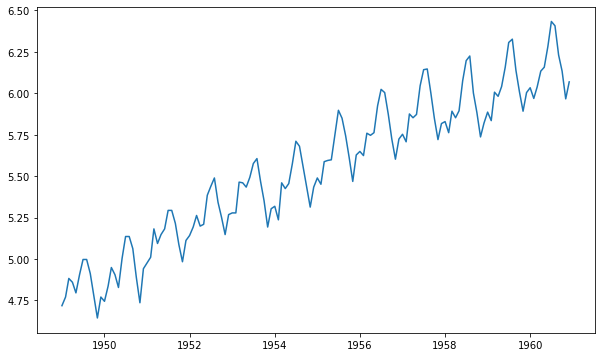

In [30]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

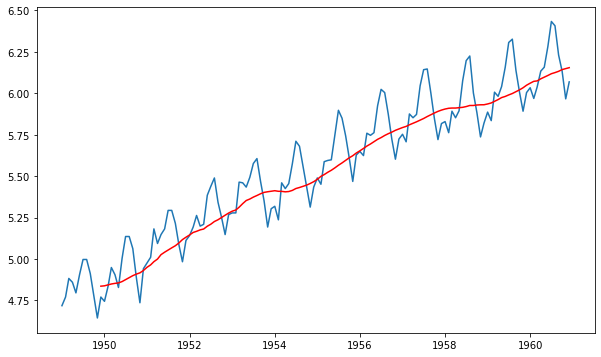

In [31]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingStd = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [32]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [72]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD =  timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color ='blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p_value','#lags used','Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value

    print(dfoutput)
    print('\n')
    if (dfoutput.p_value <= 0.05):
        print("Current Time Series is stationary!")
    else:
        print("Current Time Series is non-stationary!")
    

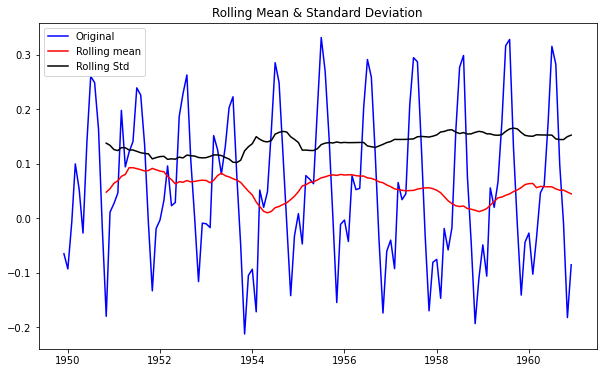

Results of Dickey-Fuller Test:
Test statistic                 -3.162908
p_value                         0.022235
#lags used                     13.000000
Number of Observation Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


Current Time Series is stationary!


In [73]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [74]:
#type(datasetLogScaleMinusMovingAverage)

In [75]:
#datasetLogScaleMinusMovingAverage['#Passengers']

In [76]:
#datasetLogScaleMinusMovingAverage.iloc[:,0]

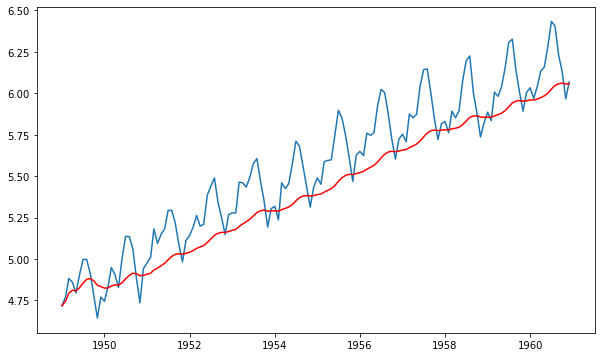

In [77]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color ='red')

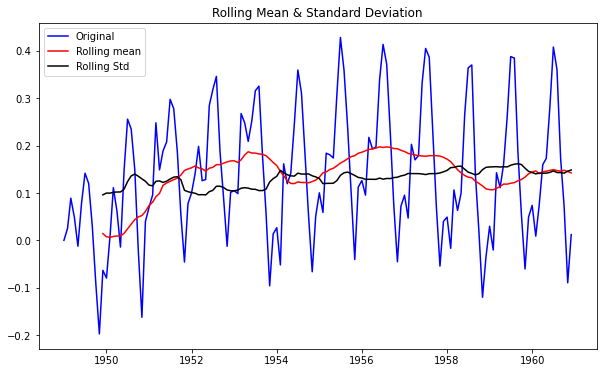

Results of Dickey-Fuller Test:
Test statistic                 -3.601262
p_value                         0.005737
#lags used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


Current Time Series is stationary!


In [45]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

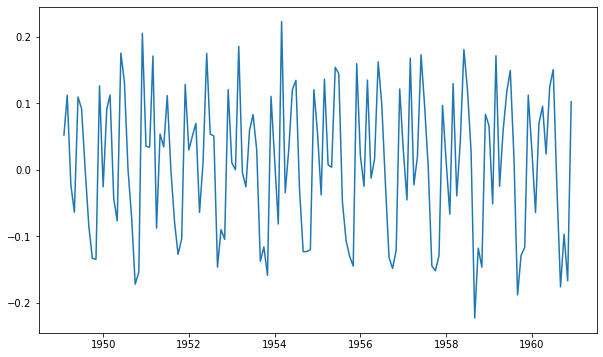

In [46]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

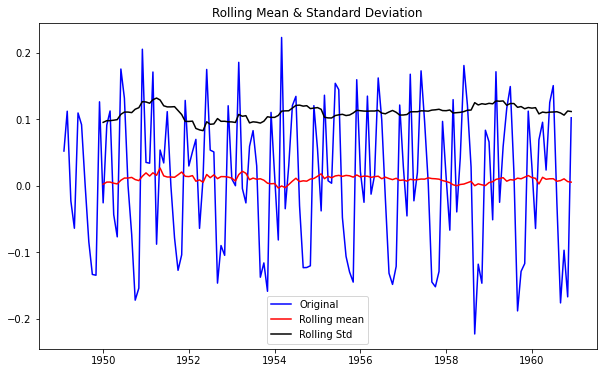

Results of Dickey-Fuller Test:
Test statistic                 -2.717131
p_value                         0.071121
#lags used                     14.000000
Number of Observation Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


Current Time Series is non-stationary!


In [47]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

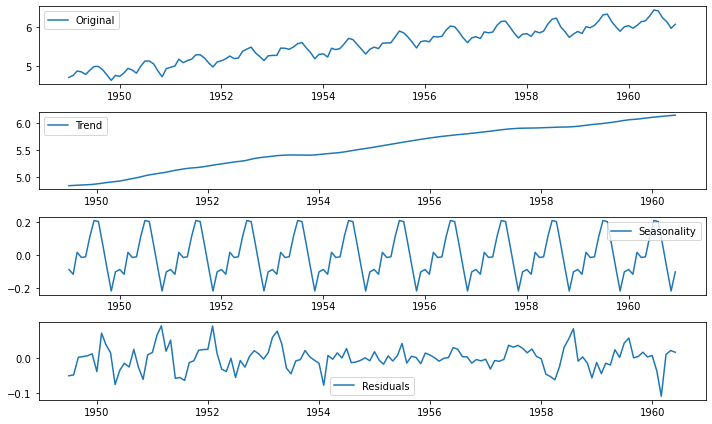

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label ='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label ='Residuals')
plt.legend(loc='best')

plt.tight_layout()



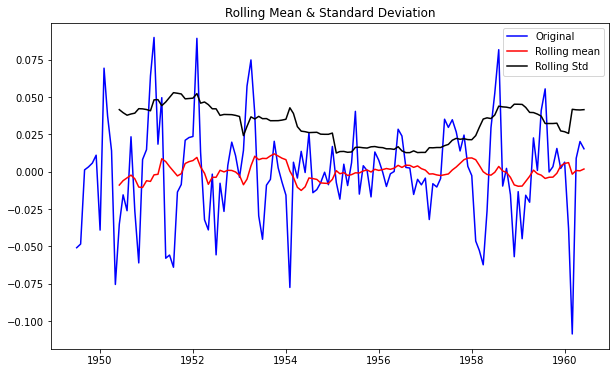

Results of Dickey-Fuller Test:
Test statistic               -6.332387e+00
p_value                       2.885059e-08
#lags used                    9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


Current Time Series is stationary!


In [82]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData.to_frame())


C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


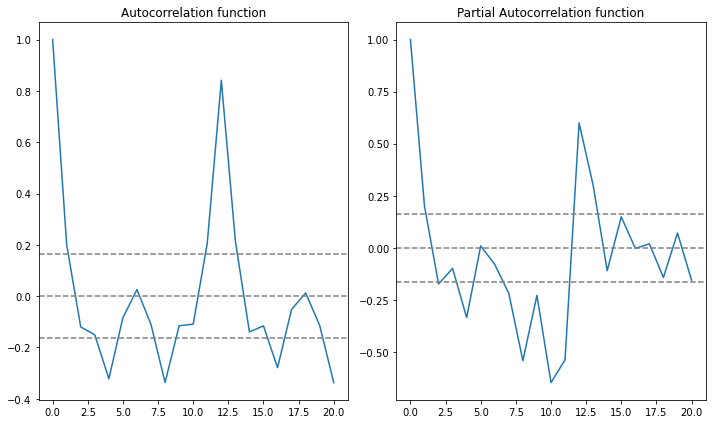

In [85]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting, nlags = 20)
lag_pacf=pacf(datasetLogDiffShifting, nlags = 20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')

plt.tight_layout()


C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warn

Plotting ARIMA model


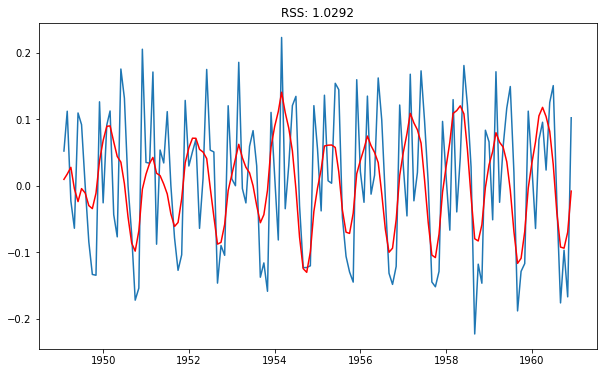

In [94]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

In [95]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [97]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372553
1960-09-01    1.280203
1960-10-01    1.186190
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64


In [106]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

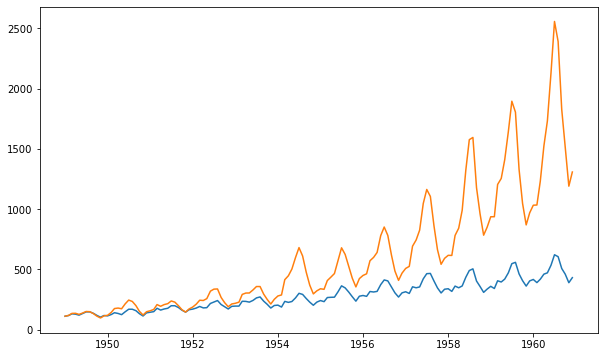

In [101]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

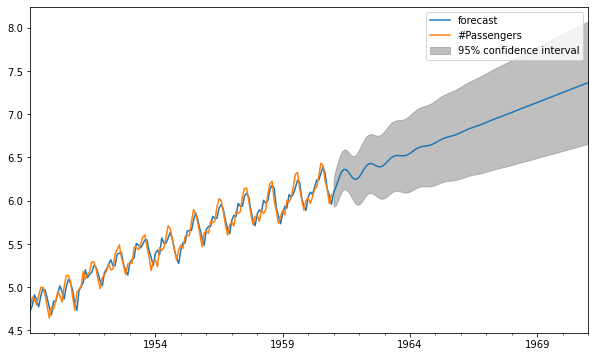

In [107]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps = 120)

In [108]:
x

(array([6.09553388, 6.15281399, 6.22442965, 6.29241106, 6.34164726,
        6.36359375, 6.35784698, 6.33139312, 6.29597542, 6.2644771 ,
        6.24738317, 6.25025162, 6.27275829, 6.3094031 , 6.35151498,
        6.38988665, 6.41727394, 6.43011065, 6.42906696, 6.4184249 ,
        6.40456149, 6.39403605, 6.3918307 , 6.40019492, 6.41833685,
        6.44295407, 6.4693744 , 6.49293994, 6.51024128, 6.5198904 ,
        6.5226758 , 6.52112383, 6.51864518, 6.51853677, 6.5231191 ,
        6.5332235 , 6.54812863, 6.56591556, 6.58410311, 6.60036544,
        6.6131327 , 6.62192782, 6.62737785, 6.63093121, 6.63438678,
        6.63937973, 6.64696493, 6.65739831, 6.67015318, 6.68414248,
        6.69806625, 6.710779  , 6.7215773 , 6.7303398 , 6.73749804,
        6.74386369, 6.75037311, 6.7578258 , 6.76668671, 6.77699813,
        6.78841311, 6.80032847, 6.81207189, 6.82308755, 6.8330713 ,
        6.84202484, 6.85022302, 6.8581121 , 6.86617328, 6.87479138,
        6.8841629 , 6.89426373, 6.90487879, 6.91